# **Buisness Context & Objectives**

Currently shareholders at the telecom company are concerned about declining customer retention and its effect on recurring revenue

##### **Key metrics to track**
- Overall churn rate
- Monthly recurring revenue (MRR) at risk
- Customer lifetime value (CLV)
- High-value customer retention rates
- Churn rates by customer segment

##### **Questions to Answer:**
1. Who is churning and what segments are most at risk?
2. Why are customers leaving — what patterns emerge?
3. What is the financial impact of churn?
4. Which retention strategies give the best ROI?
5. Can we predict future churn to target customers before they leave?

##### **Our goal is to deliver:**
- A churn risk model
- Clear insights into churn drivers
- Data-driven recommendations to increase retention and profitability


# **Exploratory Data Analysis**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load the cleaned dataset
df = pd.read_csv('CleanedData\churn_df.csv')

### **Churn Distribution**

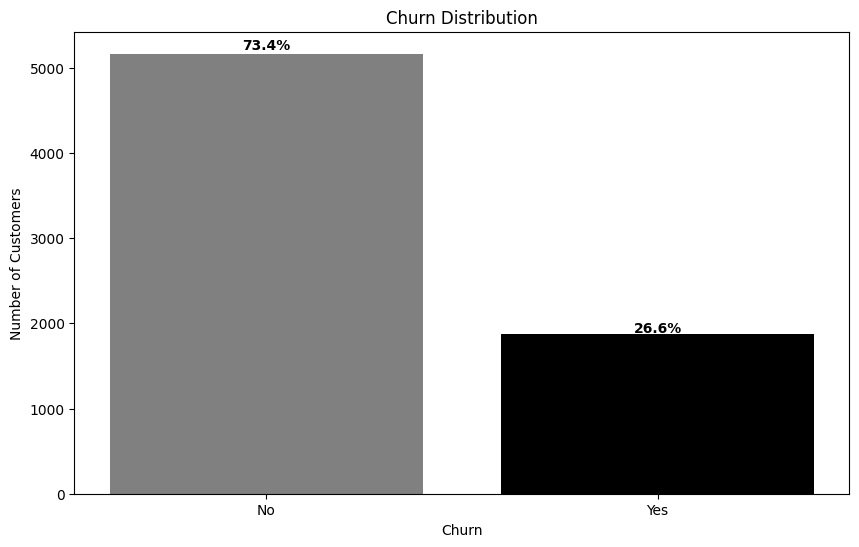

In [87]:
# Bar chart of Churn
plt.figure(figsize=(10, 6))
graph = plt.bar(df['Churn'].value_counts().index, df['Churn'].value_counts().values, color=['gray', 'black'])
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Number of Customers')

# Getting Percentage above bars
i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x,y = p.get_xy()
    plt.text(x + width/2, y + height*1.01, f'{height/df.shape[0]*100:.1f}%', ha='center', weight = 'bold')
    i += 1

plt.show()

Overall churn rate = 26.58% will affect evaluation metric choice later.

### Univariate Scans

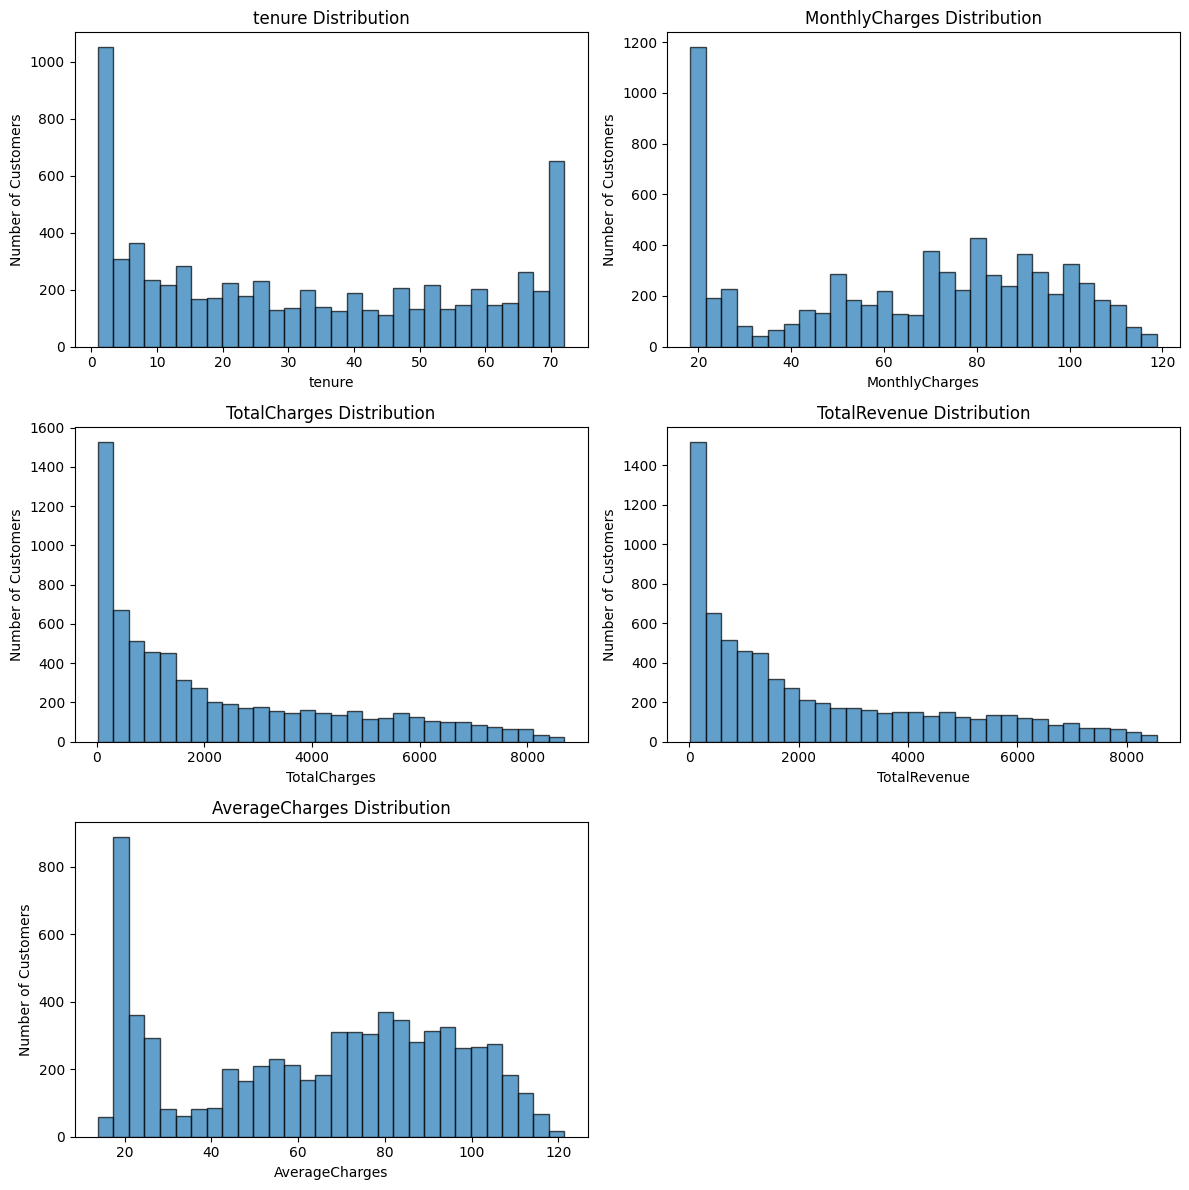

In [35]:
hist_columns = ['tenure', 'MonthlyCharges', 'TotalCharges', 'TotalRevenue', 'AverageCharges']

# Create a 3x2 grid of subplots. A 2x2 grid would not fit all 5 plots.
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
axes = axes.flatten() # Flatten the 2D array of axes to a 1D array for easier looping

for i, col in enumerate(hist_columns):
    ax = axes[i]
    ax.hist(df[col], bins=30, edgecolor='black', alpha=0.7)
    ax.set_title(f'{col} Distribution')
    ax.set_xlabel(col)
    ax.set_ylabel('Number of Customers')

# Hide the last subplot since we only have 5 plots for a 3x2 grid
if len(hist_columns) < len(axes):
    for j in range(len(hist_columns), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

All the Histograms show a bit of a skew to the left

In [68]:
# Display summary statistics for each histogram column
stats_table = pd.DataFrame()
for col in hist_columns:
    stats_table[col] = df[col].describe().to_frame()

stats_table.drop(['count']).T
    

,mean,std,min,25%,50%,75%,max
tenure,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80
TotalRevenue,2283.147248,2264.703327,18.80,397.8000,1394.575,3791.2500,8550.00
AverageCharges,64.799407,30.185918,13.78,36.1800,70.375,90.1800,121.40


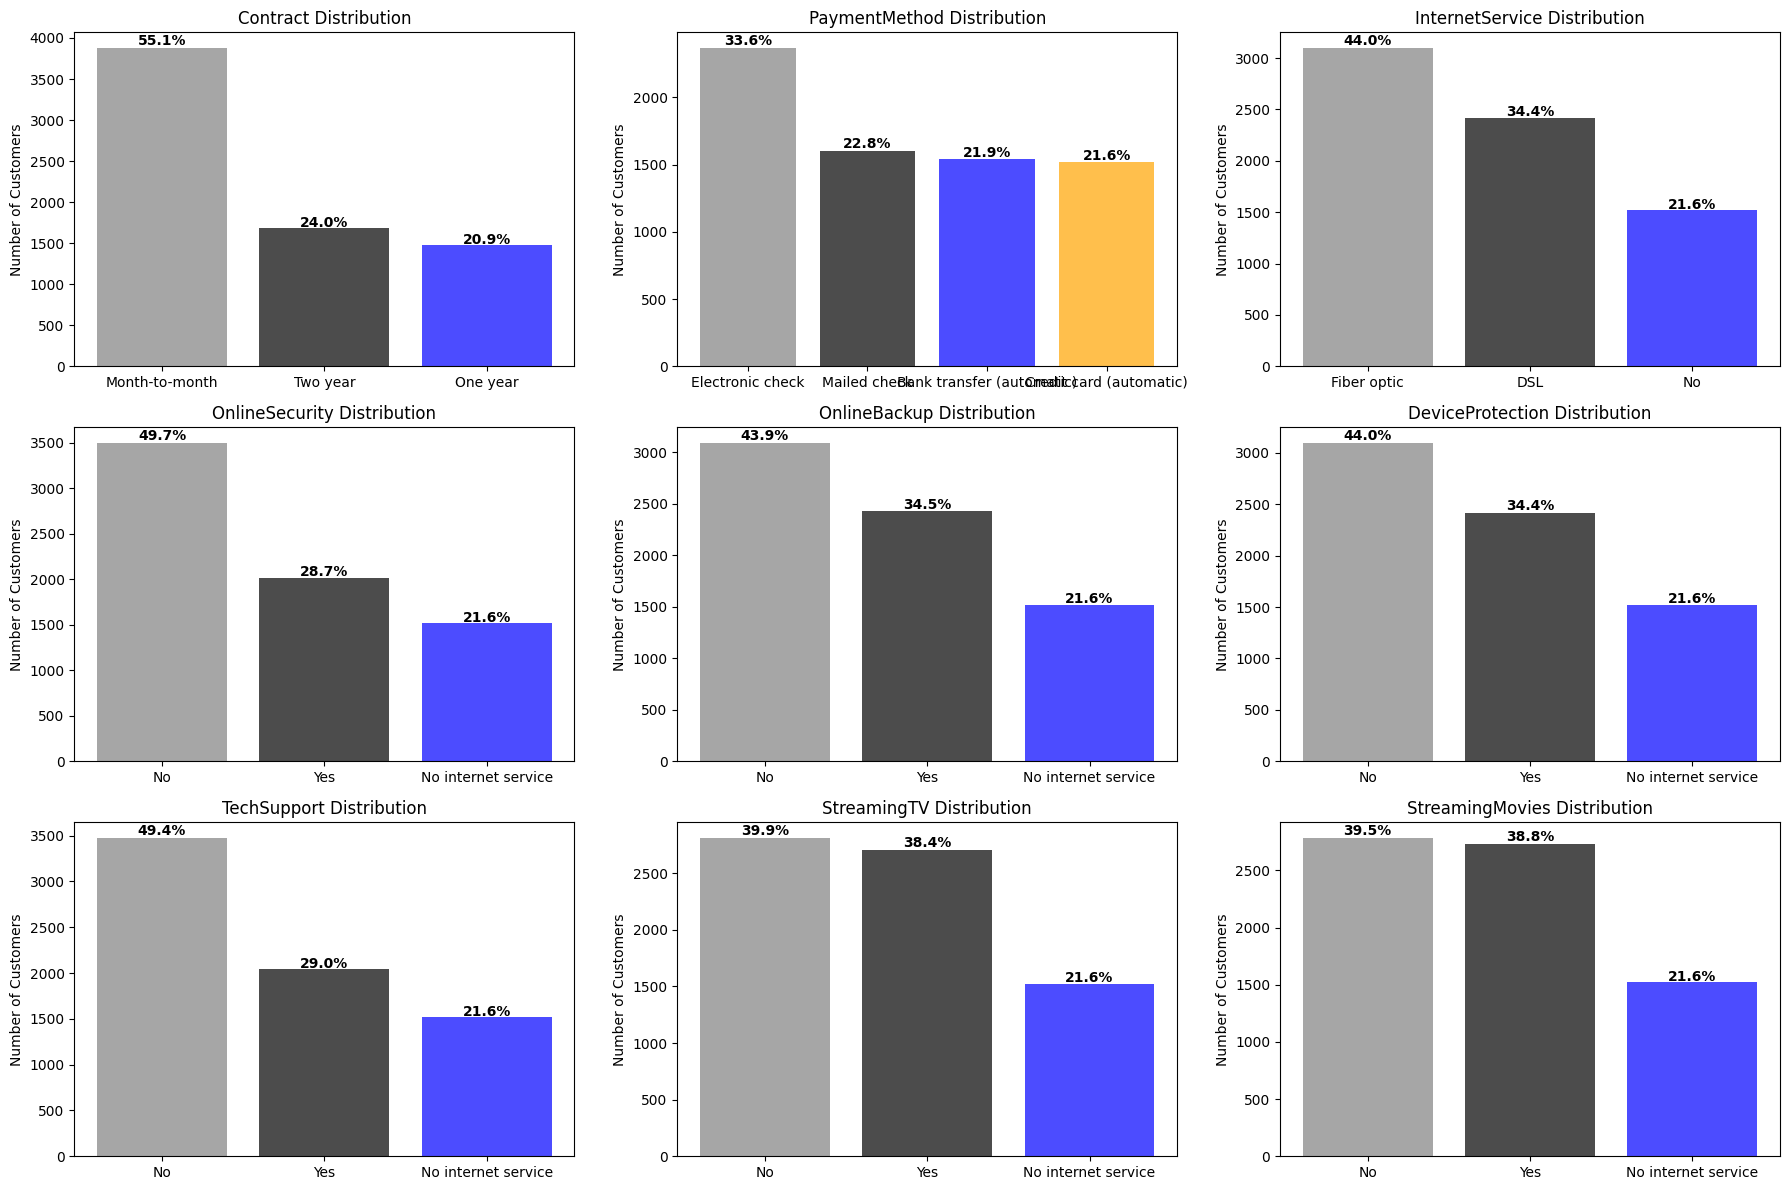

In [89]:
# Value counts for categorical columns
categorical_columns = ['Contract', 'PaymentMethod', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
# Display a bar graph for each categorical column
# Create a 3x3 grid of subplots.
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))
axes = axes.flatten() # Flatten the 2D array of axes to a 1D array for easier looping

for i, col in enumerate(categorical_columns):
    ax = axes[i]
    graph = ax.bar(df[col].value_counts().index, df[col].value_counts().values, color=['gray', 'black', 'blue', 'orange', 'green'], alpha=0.7)
    ax.set_title(f'{col} Distribution')
    #ax.set_xlabel(col)
    ax.set_ylabel('Number of Customers')

    j = 0
    for p in graph:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        ax.text(x + width/2, y + height*1.01, f'{height/df.shape[0]*100:.1f}%', ha='center', weight='bold')
        j += 1

plt.tight_layout()
plt.show()

### **Churn by Key Section**

#### Contracts & Billing

Churn              No    Yes
Contract                    
Month-to-month  57.29  42.71
One year        88.72  11.28
Two year        97.15   2.85


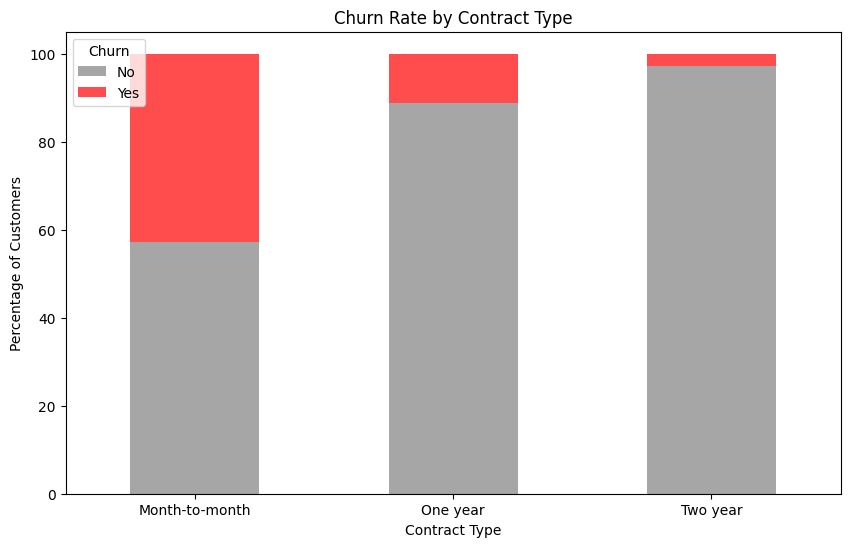

In [122]:
# Churn by Contract type
contract_churn = round(df.groupby('Contract')['Churn'].value_counts(normalize=True).unstack().fillna(0) * 100, 2)
print(contract_churn)
# Plotting the churn by contract type
contract_churn.plot(kind='bar', stacked=True, figsize=(10, 6), color=['gray', 'red'], alpha=0.7, rot = 0)
plt.title('Churn Rate by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Percentage of Customers')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

- The longer the contract the less likely a person is to Churn

Churn                No    Yes
PaperlessBilling              
No                83.62  16.38
Yes               66.41  33.59


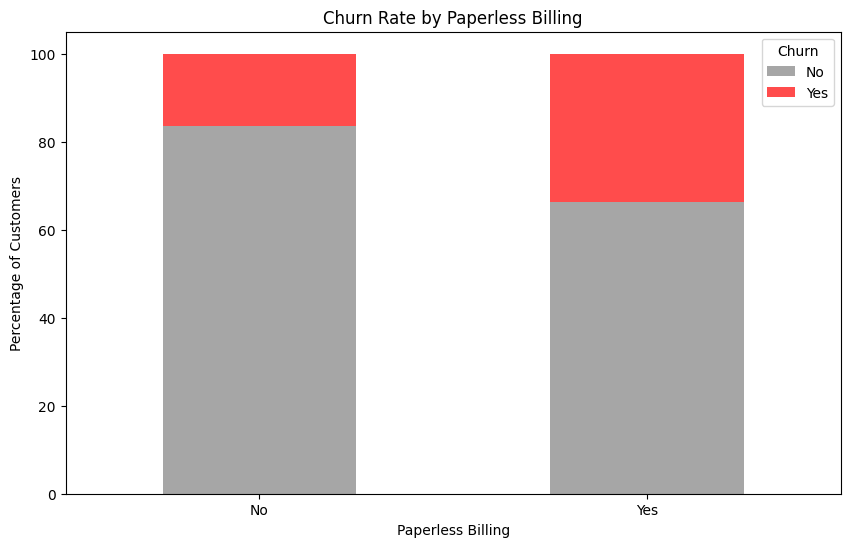

In [121]:
# Churn by PaperlessBilling 
paperless_churn = round(df.groupby('PaperlessBilling')['Churn'].value_counts(normalize=True).unstack().fillna(0) * 100, 2)
print(paperless_churn)
# Plotting the churn by PaperlessBilling
paperless_churn.plot(kind='bar', stacked=True, figsize=(10, 6), color=['gray', 'red'], alpha=0.7, rot = 0)
plt.title('Churn Rate by Paperless Billing')
plt.xlabel('Paperless Billing')
plt.ylabel('Percentage of Customers')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

- If a person does electronic billing there churn percentage is lower than if they did paper billing


Churn                         No    Yes
PaymentMethod                          
Bank transfer (automatic)  83.27  16.73
Credit card (automatic)    84.75  15.25
Electronic check           54.71  45.29
Mailed check               80.80  19.20


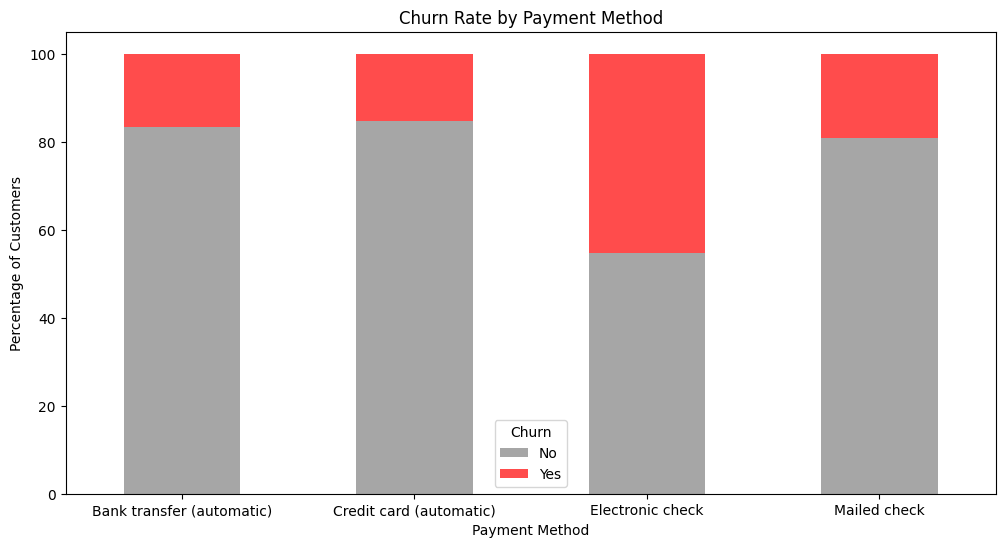

In [120]:
# Churn by Payment Method
payment_churn = round(df.groupby('PaymentMethod')['Churn'].value_counts(normalize=True).unstack().fillna(0) * 100, 2)
print(payment_churn)
# Plotting the churn by Payment Method
payment_churn.plot(kind='bar', stacked=True, figsize=(12, 6), color=['gray', 'red'], alpha=0.7, rot = 0)
plt.title('Churn Rate by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Percentage of Customers')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

- Electronic check stands out as the Churn rate for that is highest at 49.29%

#### **Services & Protection**

Churn               No    Yes
InternetService              
DSL              81.00  19.00
Fiber optic      58.11  41.89
No               92.57   7.43


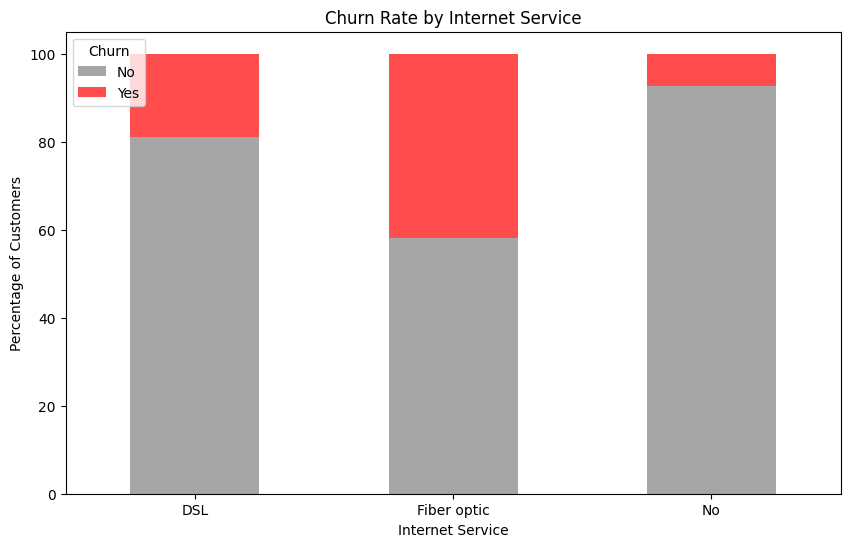

In [123]:
# Churn by Internet Service
internet_churn = round(df.groupby('InternetService')['Churn'].value_counts(normalize=True).unstack().fillna(0) * 100, 2)
print(internet_churn)
# Plotting the churn by Internet Service
internet_churn.plot(kind='bar', stacked=True, figsize=(10, 6), color=['gray', 'red'], alpha=0.7, rot = 0)
plt.title('Churn Rate by Internet Service')
plt.xlabel('Internet Service')
plt.ylabel('Percentage of Customers')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

Churn             No    Yes
AnyProtection              
No             70.18  29.82
Yes            75.55  24.45


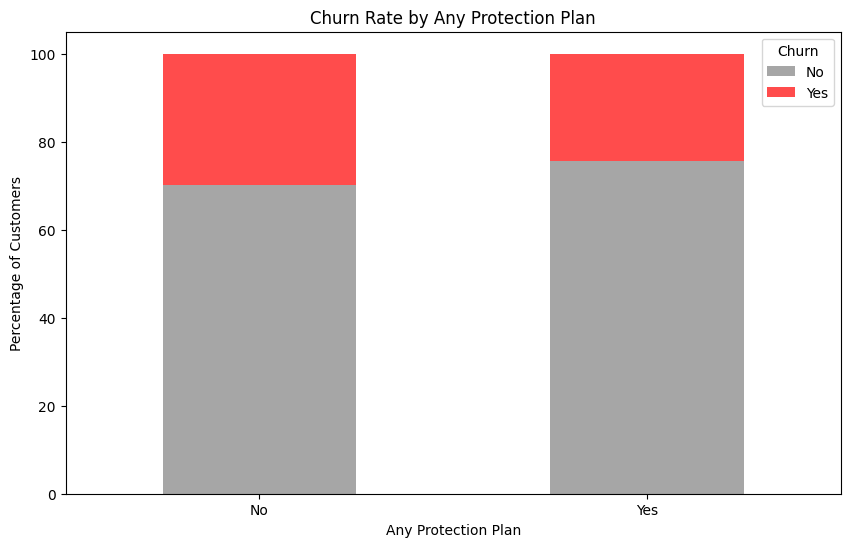

In [129]:
# Churn by Any Protection Plan
df['AnyProtection'] = df[['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']].apply(lambda x: 1 if any(x == 'Yes') else 0, axis=1)
df['AnyProtection'] = df['AnyProtection'].map({0: 'No', 1: 'Yes'})
protection_churn = round(df.groupby('AnyProtection')['Churn'].value_counts(normalize=True).unstack().fillna(0) * 100, 2)
print(protection_churn)
# Plotting the churn by Any Protection Plan
protection_churn.plot(kind='bar', stacked=True, figsize=(10, 6), color=['gray', 'red'], alpha=0.7, rot = 0)
plt.title('Churn Rate by Any Protection Plan')
plt.xlabel('Any Protection Plan')
plt.ylabel('Percentage of Customers')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

- Fiber Optic has the highest percentage of churn
- The customer's with a protection plan had a lower percentage of churn

#### **Demographics and Household**

Churn             No    Yes
SeniorCitizen              
No             76.35  23.65
Yes            58.32  41.68


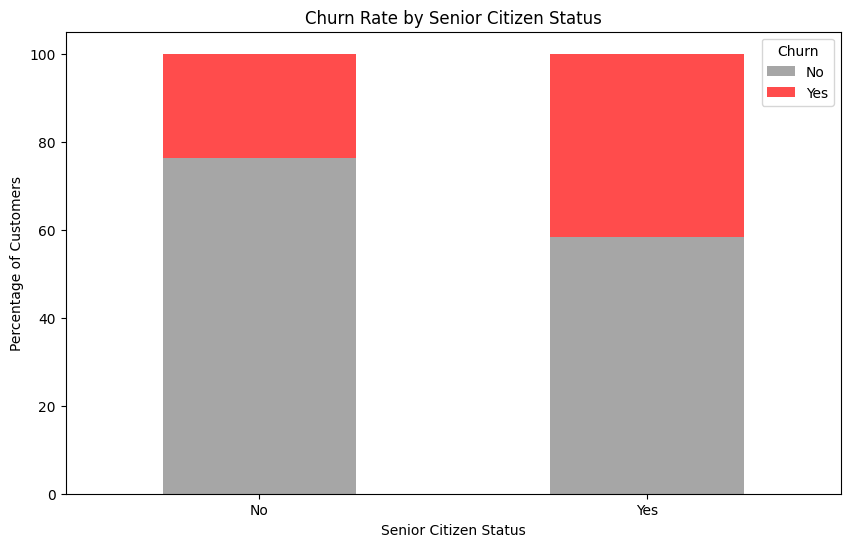

Churn       No    Yes
Partner              
No       67.02  32.98
Yes      80.28  19.72


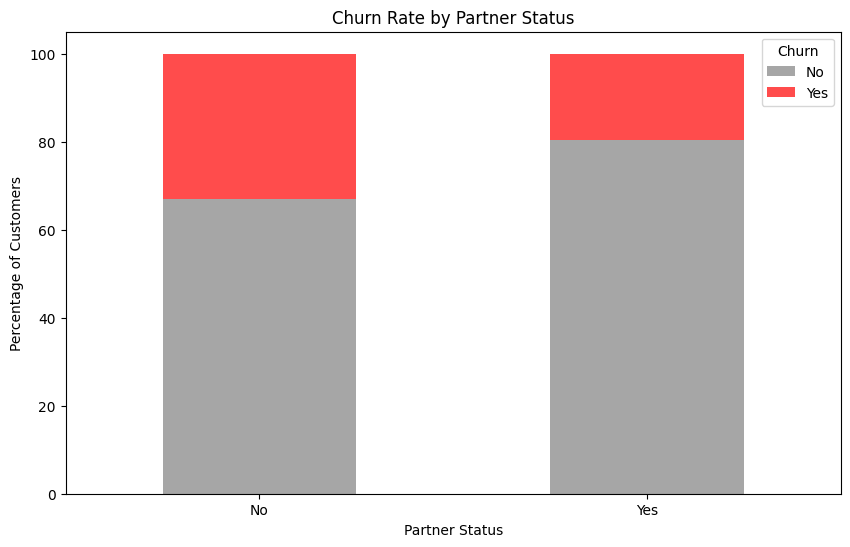

Churn          No    Yes
Dependents              
No          68.72  31.28
Yes         84.47  15.53


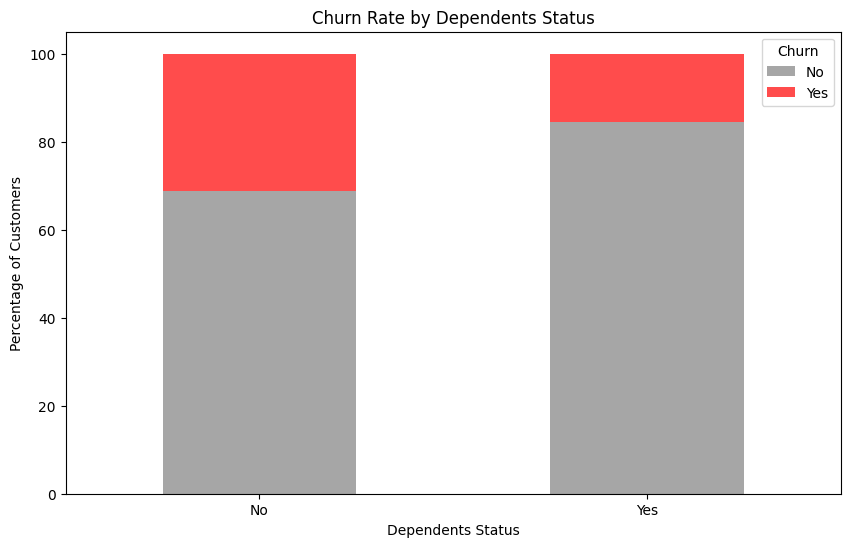

In [130]:
# Churn by Senior Citizen Status, Partner Status, and Dependents Status
senior_churn = round(df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack().fillna(0) * 100, 2)
print(senior_churn)
# Plotting the churn by Senior Citizen Status
senior_churn.plot(kind='bar', stacked=True, figsize=(10, 6), color=['gray', 'red'], alpha=0.7, rot = 0)
plt.title('Churn Rate by Senior Citizen Status')
plt.xlabel('Senior Citizen Status')
plt.ylabel('Percentage of Customers')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

partner_churn = round(df.groupby('Partner')['Churn'].value_counts(normalize=True).unstack().fillna(0) * 100, 2)
print(partner_churn)
# Plotting the churn by Partner Status
partner_churn.plot(kind='bar', stacked=True, figsize=(10, 6), color=['gray', 'red'], alpha=0.7, rot = 0)
plt.title('Churn Rate by Partner Status')
plt.xlabel('Partner Status')
plt.ylabel('Percentage of Customers')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

dependents_churn = round(df.groupby('Dependents')['Churn'].value_counts(normalize=True).unstack().fillna(0) * 100, 2)
print(dependents_churn)
# Plotting the churn by Dependents Status
dependents_churn.plot(kind='bar', stacked=True, figsize=(10, 6), color=['gray', 'red'], alpha=0.7, rot = 0)
plt.title('Churn Rate by Dependents Status')
plt.xlabel('Dependents Status')
plt.ylabel('Percentage of Customers')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

- Senior Citizens had a higher churn percentage 
- Households with Partners and Dependent status had a lower percentage of churn

### **Tenure & Price Dynamics**

#### **Tenure**

Churn           No    Yes
TenureGroup              
0-12         52.32  47.68
13-24        71.29  28.71
25-36        78.37  21.63
37-48        80.97  19.03
49+          90.49   9.51


<Axes: xlabel='TenureGroup'>

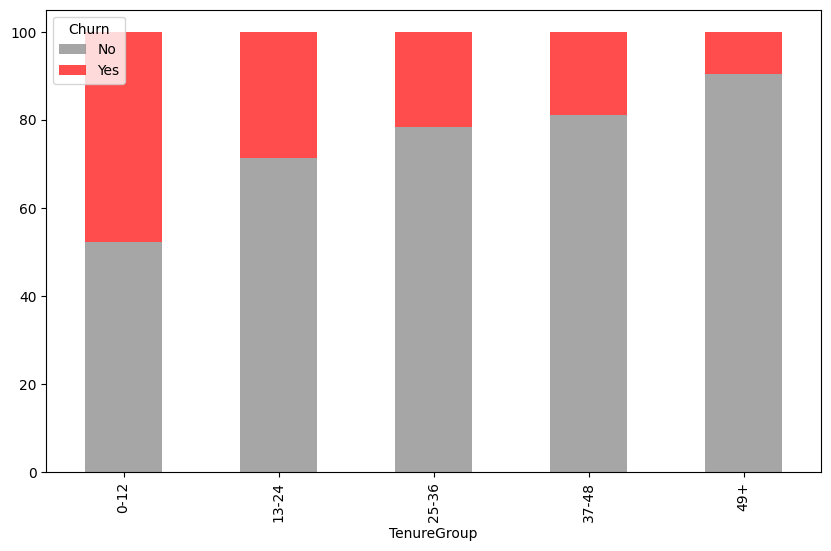

In [ ]:
# Churn rate by Tenure Groups
tenureGroup_churn = round(df.groupby(['TenureGroup'])['Churn'].value_counts(normalize=True).unstack().fillna(0) * 100, 2)
print(tenureGroup_churn)

tenureGroup_churn.plot(kind = 'bar', stacked= True, figsize = (10, 6), color = ['gray', 'red'], alpha = 0.7)

